## 이미지 인식

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


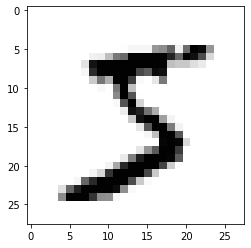

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [2]:
##############신경망으로 이미지 인식 ###############
from keras.datasets import mnist
from keras.utils import np_utils 
import numpy 
import sys
import tensorflow as tf

numpy.random.seed(0)
tf.random.set_seed(0)

# MNIST데이터셋 로드
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))


import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()


# 코드로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

#28X28의 2차원배열 => 784개의 1차원 배열 변환 reshape(총 샘플수, 1차원 속성의 수)
#X_train.reshape(X_train[0].shape, 784)

X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')

X_train = X_train / 255  #정규화


X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

print(X_train[0])  #정규화 변환 확인

# Y 클래스 값 확인
print("class : %d " % (Y_class_train[0]))

# Y 클래스 값 one-hot encoder 변환
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0])  #one-hot encoder 변환 확인



Epoch 00001: val_loss improved from inf to 0.14869, saving model to ./model/01-0.1487.hdf5

Epoch 00002: val_loss improved from 0.14869 to 0.10799, saving model to ./model/02-0.1080.hdf5

Epoch 00003: val_loss improved from 0.10799 to 0.09880, saving model to ./model/03-0.0988.hdf5

Epoch 00004: val_loss improved from 0.09880 to 0.07341, saving model to ./model/04-0.0734.hdf5

Epoch 00005: val_loss improved from 0.07341 to 0.06971, saving model to ./model/05-0.0697.hdf5

Epoch 00006: val_loss improved from 0.06971 to 0.06756, saving model to ./model/06-0.0676.hdf5

Epoch 00007: val_loss improved from 0.06756 to 0.06505, saving model to ./model/07-0.0651.hdf5

Epoch 00008: val_loss improved from 0.06505 to 0.05937, saving model to ./model/08-0.0594.hdf5

Epoch 00009: val_loss improved from 0.05937 to 0.05888, saving model to ./model/09-0.0589.hdf5

Epoch 00010: val_loss did not improve from 0.05888

Epoch 00011: val_loss did not improve from 0.05888

Epoch 00012: val_loss did not impro

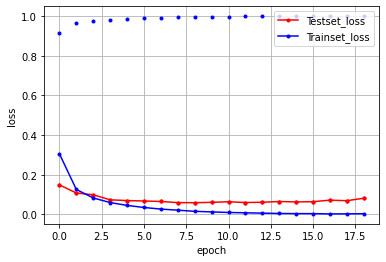

In [3]:
#모델 정의 
#첫번째 은닉층 (출력뉴런수 512, 활성화함수 relu)
#출력층 (출력뉴런수 10, 활성화함수 softmax)
#오차함수 : categorial_crossentroy
#최적화 함수
#다중 분류 평가 측정 지표 accuracy
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
#모델 실행 결과 model폴더에 파일로 저장
#학습 중단 설정

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

 
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

#학습 정확도와 테스트셋 오차를 시각화
# 테스트 셋의 오차
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)




# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


## 컨볼루션 신경망(Convolutional Neural Network,CNN)

- 기본 딥러닝 프레임에 이미지 인식 분야에서 강력한 성능을 보이는 신경망
- 입력된 이미지에서 다시 특징을 추출하기 위해 마스크(필터,윈도 또는 커널)를 도입하는 기법
- 입력층과 출력층 사이의 중간층(은폐층)에 합성곱과 폴링층 배치한 것
- 이미지를 흐리게만들거나 경계를 강조하는 작업 함
- 합성곱층과 풀링층에서는 해상도를 낮추거나 샘플링하는 처리를 계속 함
- 특징을 추출하는 기능을 하는 필터와 필터 값을 비선형 값으로 바꾸어 주는 Activation 함수로 구성

- 합성곱층(컨볼루션)은 이미지의 특징을 추출할 때 사용
- 입력 x의 일부분을 조금씩 자르면서 평활화와 윤곽선 검출 처리를 하며, 특징 맵 c 추출
- 합성곱층의 역할은 주변의 값과 필터를 사용해 중앙에 있는 값을 변화 시키는 것
- 평활화: 명암의 분포가 균일하지 못한 이미지에 적용해 분포를 균일하게 만들어주는 것
- 폴링층: 합성곱층으로 얻은 특징맵 x를 축소하는 층

- 컨볼루션 층을 추가 하는 함수: Conv2D()
    ex)model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
    

#### 맥스 풀링(max pooling)

: Actication map을 M * N의 크기로 자른후, 그안에서 가장 큰 값을 뽑아내는 방법

풀링,서브 샘플링: 컨볼루션 층을 통해 이미지 특징 도출 결과가 여전히 크고 복잡하면 다시 축소하는 과정
- 맥스 풀링: 정해진 구역안에서 가장 큰 값만 다음 층으로 넘기고 나머지는 버림
- sampling을 통해서 연산에 들어가는 컴퓨팅 리소스가 적아지고 데이타의 크기를 줄이면서 소실이 발생하기 때문에, 오버피팅 방지

* 컨볼루셔널 레이어: 컨볼루셔널 필터와 액티베이션 함수(ReLU) 그리고 풀링 레이어를 반복적으로 조합하여 특징 추출
* Fully connected Layer: 컨볼루셔널 계층에서 특징이 추출이 되었으면 이 추출된 특징 값을 기존의 뉴럴 네트워크에 넣어서 분류


### 컨볼루션 신경망 - 과적합 피하기

- 드롭아웃(drop out)기법: 은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것
- 랜덤하게 노드를 끔으로써 학습 데이터에 지나치게 치우쳐서 학습되는 과적합 방지 가능

In [6]:
###########CNN 실습##########################
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.python.keras.optimizers import TFOptimizer


import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

 
numpy.random.seed(0)
tf.random.set_seed(3)

# 데이터 로드
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#정규화
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 정답 label one-hot enconding
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

#모델 정의
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


#모델 구축 컴파일
model.compile(loss='categorical_crossentropy',   optimizer='adam', metrics=['accuracy'])


#모델 실행 결과 model폴더에 파일로 저장
#학습 중단 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

#정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

#학습셋 오차와 테스트셋 오차를 시각화
# 테스트 셋의 오차
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_loss, "o", c="blue", markersize=3)

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()



Epoch 00001: val_loss improved from inf to 0.05221, saving model to ./model/01-0.0522.hdf5


AttributeError: module 'keras.optimizers' has no attribute 'TFOptimizer'